<a href="https://colab.research.google.com/github/atoothman/data71200/blob/main/DATA_71200_Project_1_Mushroom_Classification_Toothman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 71200 - Project 1 Mushroom Classification

The Mushroom dataset used was found on the UC Irvine Machine Learning Repository [https://archive.ics.uci.edu/dataset/73/mushroom](https://archive.ics.uci.edu/dataset/73/mushroom)

The dataset includes 23 species of gilled mushrooms in the Agaricus and Lepiota family that were classificed as edible or poisonous. Samples identifed as unknown or not recommended were combined into poisonous.

The dataset is comprised of 22 features. Two features are binary and 20 are categorical.

The aim of this model is to predict if the mushroom is poisonous or edible based on its physical characteristics. The target is categorical.

# Step 1: Load Dataset

In [ ]:
import pandas as pd

# URL of the mushroom dataset from UC Irving ML repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"



# Load the dataset into a DataFrame
mushroom_df = pd.read_csv(url, header=None, index_col=False, names=[
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

# Display the DataFrame
display(mushroom_df)


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
# Show dataset info
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Check for missing values

On the UCI ML page for mushrooms it says there are missing values in "stalk-root". Next steps are searching for missing values.

In [ ]:
# Check for missing values in mushroom_df
missing_values = mushroom_df.isnull().sum()

# Print missing values in mushroom_df
print("Missing Values:")
print(missing_values)

Missing Values:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Code is showing there are no missing values for "stalk-root" under NaN

Examining the UCI ML page further shows that "stalk-root" has the following:
bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,**missing=?**

"?" is encoded to represent the missing values.

Checking for occurrences of "?" in each column

In [ ]:
# Check missing values encoded as '?'
missing_values = mushroom_df.isin(['?']).sum()

# Print missing values
print("Missing values:")
print(missing_values)

Missing values:
class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


Stalk-root has 2480 missing values.


It was elected to remove the column "stalk-root" as removing 2480 rows might have a larger impact on the model then removing this feature as there are a significant amount of other features to work with.

In [ ]:
# Remove 'stalk-root' from mushroom_df and create modified dataframe = mushroom_df_v2
mushroom_df_v2 = mushroom_df.drop(['stalk-root'],axis=1)

display(mushroom_df_v2)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# One-Hot Encoding of categorical data

The mushroom data set is comprised of 19 categorical features

In [ ]:
# List of categorical columns omiting "stalk-root"
categorical_columns = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor','gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# One-hot encode categorical columns
mushroom_df_encoded = pd.get_dummies(mushroom_df_v2, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
display(mushroom_df_encoded)


,poisonous_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,True,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False


# Step 2: Divide into a training set and testing set



In [ ]:
# Utilize scikitlearn for a stratify split
from sklearn.model_selection import StratifiedShuffleSplit

# Separate the features (X) and the target variable (y) aka poisonous_p
X = mushroom_df_encoded.drop('poisonous_p', axis=1)
y = mushroom_df_encoded['poisonous_p']

# Create StratifiedShuffleSplit with 1 split, 20% test size, 80% training and random state 42
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Split data
for train_index, test_index in split.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

# Check to confirm successful 80 : 20 split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (6499, 91)
X_test: (1625, 91)
y_train: (6499,)
y_test: (1625,)


Confirming the split was successful. The training set has 80% of the original 8124 instances, while the testing set has 20% of the original instances. 91 in the X-train and X_test show the number of columns/features after one-hot encoding.



# Step 3: Explore the training set



In [ ]:
# Training set infomation on X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6499 entries, 5249 to 2411
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   cap-shape_c                 6499 non-null   bool 
 1   cap-shape_f                 6499 non-null   bool 
 2   cap-shape_k                 6499 non-null   bool 
 3   cap-shape_s                 6499 non-null   bool 
 4   cap-shape_x                 6499 non-null   bool 
 5   cap-surface_g               6499 non-null   bool 
 6   cap-surface_s               6499 non-null   bool 
 7   cap-surface_y               6499 non-null   bool 
 8   cap-color_c                 6499 non-null   bool 
 9   cap-color_e                 6499 non-null   bool 
 10  cap-color_g                 6499 non-null   bool 
 11  cap-color_n                 6499 non-null   bool 
 12  cap-color_p                 6499 non-null   bool 
 13  cap-color_r                 6499 non-null   bool 
 14  cap-color_

In [ ]:
# Training set description of X_train
X_train.describe()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,...,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,6495,3982,5846,6472,3562,6496,4449,3929,6464,5319,...,6165,5509,3281,5113,4770,5839,6268,5608,6198,6342


In [ ]:
# Training set infomation on y_train
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6499 entries, 5249 to 2411
Series name: poisonous_p
Non-Null Count  Dtype
--------------  -----
6499 non-null   bool 
dtypes: bool(1)
memory usage: 57.1 KB


In [ ]:
# Training set description of X_train
y_train.describe()

count      6499
unique        2
top       False
freq       3366
Name: poisonous_p, dtype: object

# Step 4: Data Cleaning

Data was cleaned in [44] and the column "stalk-root" was removed from the dataset prior to splitting the dataset due to the missing values identified.

X_train and y_train are checked to be sure there are no missing values. No additional missing values were found.

In [ ]:
# Double checking X_train dataset to ensure there are no NaN or missing values encoded as '?' and all were removed prior to splitting data

# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Print missing values in X_train
print("Missing Values:")
print(missing_values)

# Check missing values encoded as '?'
missing_values = X_train.isin(['?']).sum()

# Print missing values
print("Missing values encoded as ?:")
print(missing_values)

Missing Values:
cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
cap-shape_s    0
cap-shape_x    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 91, dtype: int64
Missing values encoded as ?:
cap-shape_c    0
cap-shape_f    0
cap-shape_k    0
cap-shape_s    0
cap-shape_x    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 91, dtype: int64


In [ ]:
# Double checking y_train dataset to ensure there are no NaN or missing values encoded as '?' and all were removed prior to splitting data

# Check for missing values in y_train
missing_values = y_train.isnull().sum()

# Print missing values in y_train
print("Missing Values:")
print(missing_values)

# Check missing values encoded as '?'
missing_values = y_train.isin(['?']).sum()

# Print missing values
print("Missing values encoded as ?:")
print(missing_values)

Missing Values:
0
Missing values encoded as ?:
0


# Step 5: Visualize the data in training set



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

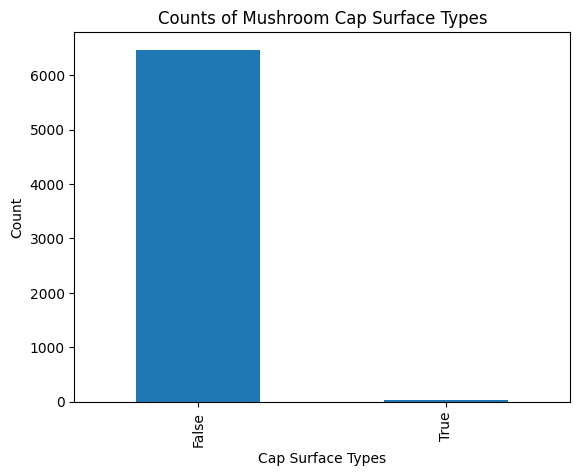

In [ ]:
X_train['cap-color_c'].value_counts().plot(kind='bar')

plt.title('Counts of Mushroom Cap Surface Types')
plt.xlabel('Cap Surface Types')
plt.ylabel('Count')
plt.show()

In [ ]:
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

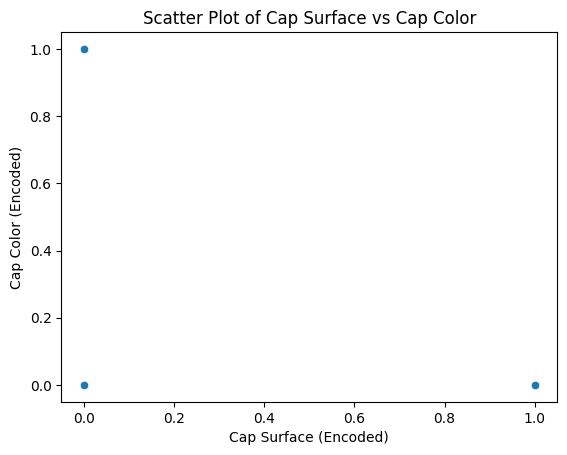

In [ ]:


sns.scatterplot(x=X_train['cap-surface_g'], y=X_train['cap-color_c'])
plt.title('Scatter Plot of Cap Surface vs Cap Color')
plt.xlabel('Cap Surface (Encoded)')
plt.ylabel('Cap Color (Encoded)')
plt.show()

# Step 6: Apply transformations to data.

The following transformations are applied to cap-color_c and cap-surface_y


*  Squaring (**2)
*  Cubing (**3)
*  np.log
*  np.exp

Plot histograms and scatter matrices to explore the resultant data


In [ ]:
import numpy as np

The following transformations are applied to cap-color_c

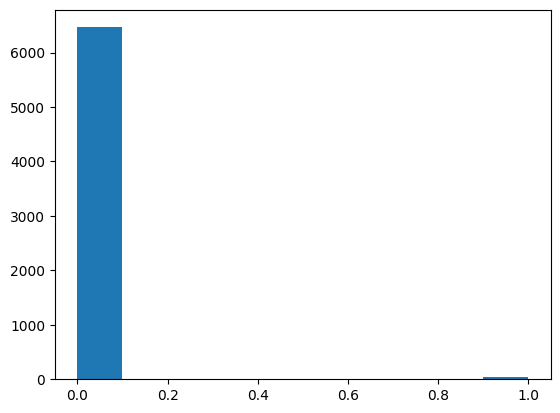

In [ ]:
# Histogram for cap-color_c with squareing (**2) transformation
plt.hist(X_train['cap-color_c'].values.reshape(-1, 1)**2, bins=10)
plt.show()

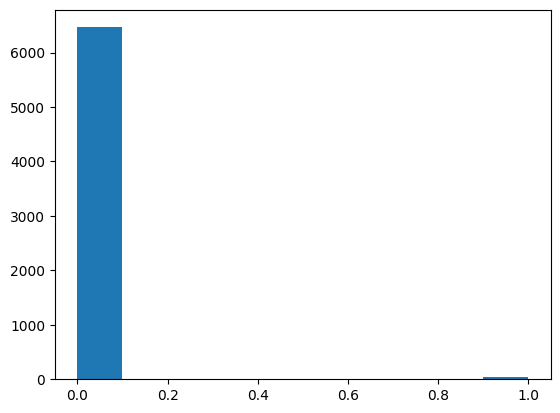

In [ ]:
# Histogram for cap-color_c with cubing (**3) transformation
plt.hist(X_train['cap-color_c'].values.reshape(-1, 1)**3, bins=10)
plt.show()

In [ ]:
# Histogram for cap-color_c with np.log transformation cannot be applied because it can only work for numerical data and there is no numerical data in the dataset
# The code would look like the below but using numerical data in place of ['cap-color_c']

# plt.hist(np.log(X_train['cap-color_c']), bins=10)

In [ ]:
# Histogram for cap-color_c with np.exp transformation cannot be applied because it can only work for numerical data and there is no numerical data in the dataset
# The code would look like the below but using numerical data in place of ['cap-color_c']

# plt.hist(np.exp(X_train['cap-color_c']), bins=10)

The following transformations are applied to cap-surface_y

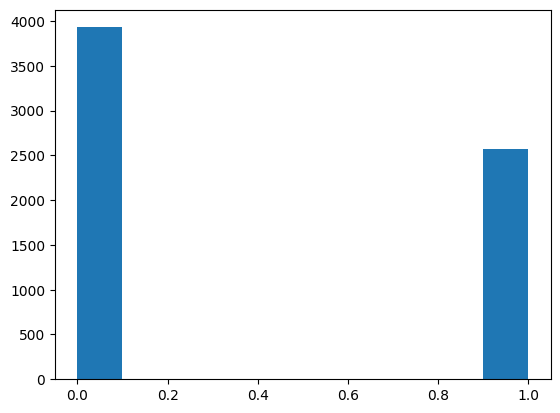

In [ ]:
# Histogram for cap-surface_y with squareing (**2) transformation
plt.hist(X_train['cap-surface_y'].values.reshape(-1, 1)**2, bins=10)
plt.show()

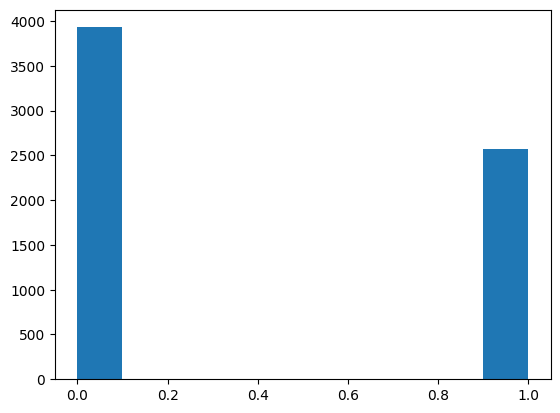

In [ ]:
# Histogram for cap-surface_y with cubing (**3) transformation
plt.hist(X_train['cap-surface_y'].values.reshape(-1, 1)**3, bins=10)
plt.show()

In [ ]:
# Histogram for 'cap-surface_y' with np.log transformation cannot be applied because it can only work for numerical data and there is no numerical data in the dataset
# The code would look like the below but using numerical data in place of ['cap-surface_y']

#plt.hist(np.log(X_train['cap-surface_y']), bins=10)

In [ ]:
# Histogram for 'cap-surface_y' with np.exp transformation cannot be applied because it can only work for numerical data and there is no numerical data in the dataset
# The code would look like the below but using numerical data in place of ['cap-surface_y']

# plt.hist(np.exp(X_train['cap-surface_y']), bins=10)

Scatter Matrices


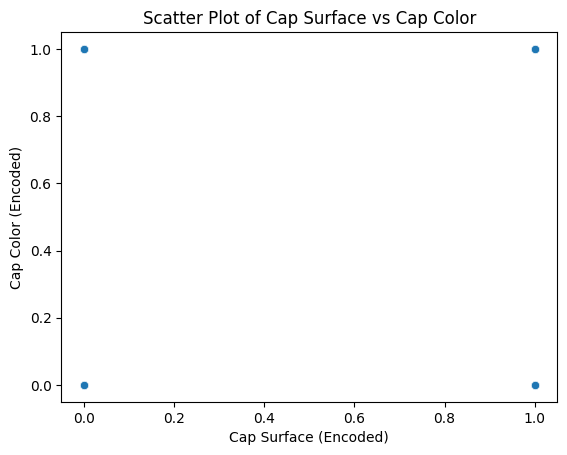

In [ ]:
# Original scatterplot using seaborn due to scatter_matrix not working on 0 values
sns.scatterplot(x=X_train['cap-surface_y'], y=X_train['cap-color_c'])
plt.title('Scatter Plot of Cap Surface vs Cap Color')
plt.xlabel('Cap Surface (Encoded)')
plt.ylabel('Cap Color (Encoded)')
plt.show()

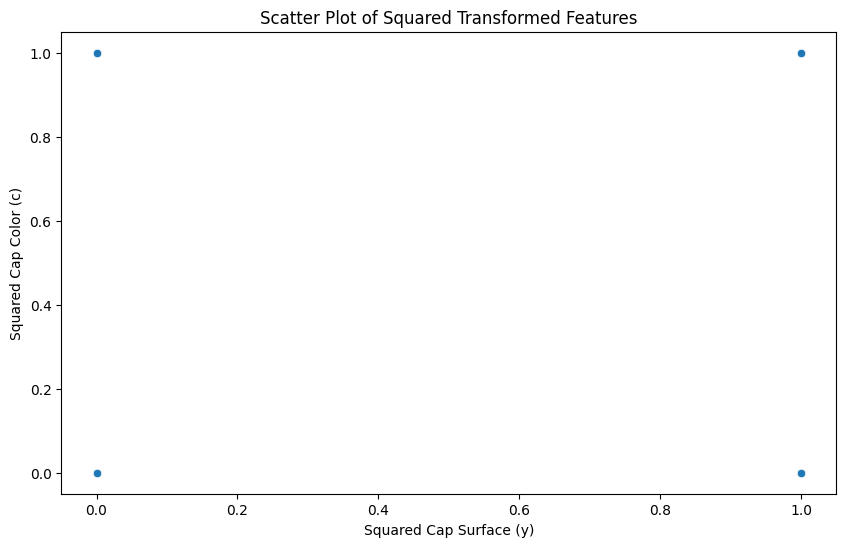

In [ ]:
X_train.loc['cap-surface_y_squared'] = X_train['cap-surface_y'] ** 2
X_train.loc['cap-color_c_squared'] = X_train['cap-color_c'] ** 2

# Plot the scatter plot of the squared transformed features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['cap-surface_y_squared'], y=X_train['cap-color_c_squared'])

# Add titles and labels to the plot
plt.title('Scatter Plot of Squared Transformed Features')
plt.xlabel('Squared Cap Surface (y)')
plt.ylabel('Squared Cap Color (c)')
plt.show()

<ipython-input-214-a58184831d15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, 'cap-surface_y_cubed'] = X_train['cap-surface_y'] ** 3
<ipython-input-214-a58184831d15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, 'cap-color_c_cubed'] = X_train['cap-color_c'] ** 3


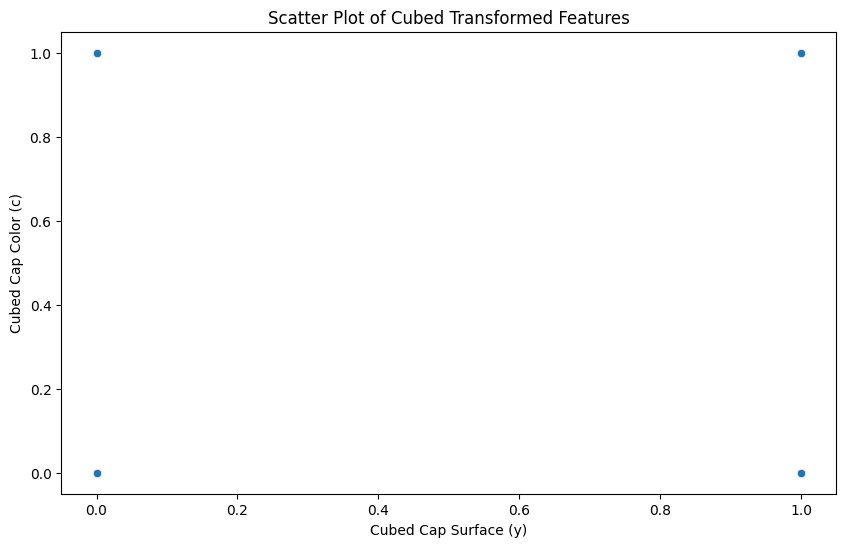

In [ ]:
X_train.loc[:, 'cap-surface_y_cubed'] = X_train['cap-surface_y'] ** 3
X_train.loc[:, 'cap-color_c_cubed'] = X_train['cap-color_c'] ** 3

# Plot the scatter plot of the cubed transformed features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['cap-surface_y_cubed'], y=X_train['cap-color_c_cubed'])

# Add titles and labels to the plot
plt.title('Scatter Plot of Cubed Transformed Features')
plt.xlabel('Cubed Cap Surface (y)')
plt.ylabel('Cubed Cap Color (c)')
plt.show()